In [1]:
%matplotlib inline
import numpy as np
from numpy import fft as ft
from matplotlib import pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=11)

plt.close('all') # tidy up any unshown plots

Simple Gaussian function:

In [2]:
def gaussian(x, loc, scale):

  retVar = np.exp(-0.5*((x - loc)/scale)**2.)/(scale*np.sqrt(2.*np.pi))

  return retVar

Define the spatial extent and the grid in real space:

In [3]:
n_pix = 128
extent = 8

x_grid = np.linspace(-extent,extent,n_pix)
dx = np.abs(x_grid[0] - x_grid[1])

Define some sizes for the Gaussians and create them in real space:

In [4]:
s0 = 1.0
s1 = 0.56
s2 = 2.32

# create real sapce Gaussians
g1 = gaussian(x_grid, 0, s0)
g2 = gaussian(x_grid, 0, s0*s1)
g3 = gaussian(x_grid, 0, s0*s2)

Text(0.5, 1.0, '$\\sigma = 2.32$')

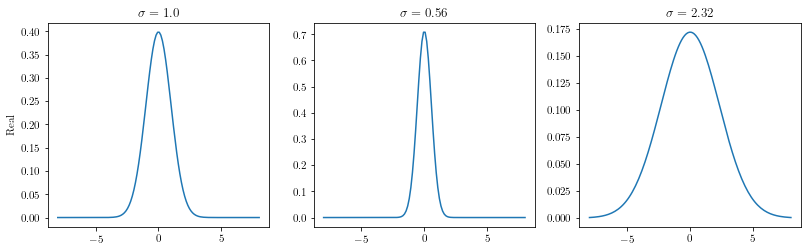

In [5]:
plt.figure(1, figsize=(3*4.5, 3.75))
plt.subplot(1,3,1)
plt.plot(x_grid, g1, '-')
plt.title('$\sigma = {0}$'.format(s0))
plt.ylabel('Real')
plt.subplot(1,3,2)
plt.plot(x_grid, g2, '-')
plt.title('$\sigma = {0}$'.format(s1))
plt.subplot(1,3,3)
plt.plot(x_grid, g3, '-')
plt.title('$\sigma = {0}$'.format(s2))

Fourier transform the Gaussians, including the shift of the zero mode:

In [6]:
F_g1 = ft.fftshift(ft.fft(g1))
F_g2 = ft.fftshift(ft.fft(g2))
F_g3 = ft.fftshift(ft.fft(g3))

# Get the k-space labels
k_g1 = ft.fftshift(ft.fftfreq(n_pix, 1./dx))
k_g2 = ft.fftshift(ft.fftfreq(n_pix, 1./dx))
k_g3 = ft.fftshift(ft.fftfreq(n_pix, 1./dx))

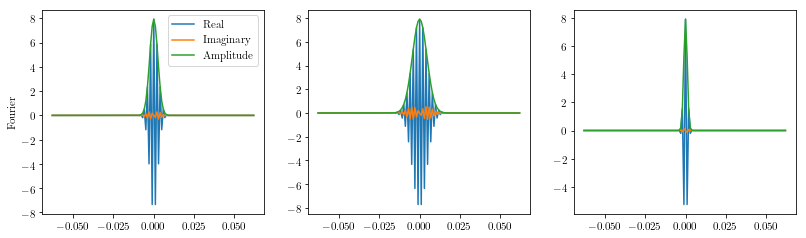

In [7]:
plt.figure(2, figsize=(3*4.5, 3.75))
plt.subplot(1,3,1)
plt.plot(k_g1, np.real(F_g1), '-', label='Real')
plt.plot(k_g1, np.imag(F_g1), '-', label='Imaginary')
plt.plot(k_g1, np.abs(F_g1), '-', label='Amplitude')
plt.legend()
plt.ylabel('Fourier')
plt.subplot(1,3,2)
plt.plot(k_g2, np.real(F_g2), '-')
plt.plot(k_g2, np.imag(F_g2), '-')
plt.plot(k_g2, np.abs(F_g2), '-')

plt.subplot(1,3,3)
plt.plot(k_g3, np.real(F_g3), '-')
plt.plot(k_g3, np.imag(F_g3), '-')
plt.plot(k_g3, np.abs(F_g3), '-')

Rescale the Guassians by re-labeling the frequencies in Fourier space:

In [8]:
k_g2_scale = k_g2*s1
k_g3_scale = k_g3*s2

Interpolate the re-scaled Gaussians onto the original common grid:

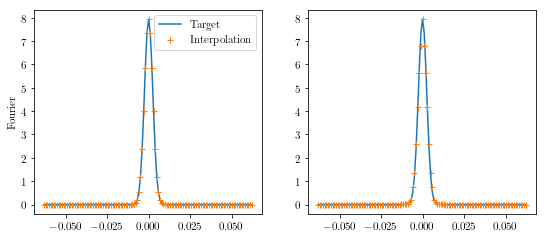

In [9]:
F_g2_interp = np.interp(k_g1, k_g2_scale, np.abs(F_g2))
F_g3_interp = np.interp(k_g1, k_g3_scale, np.abs(F_g3))

plt.figure(3, figsize=(2*4.5, 3.75))
plt.subplot(1,2,1)
plt.plot(k_g1, np.abs(F_g1), '-', label='Target')
plt.plot(k_g2, F_g2_interp, '+', label='Interpolation')
plt.ylabel('Fourier')
plt.legend()

plt.subplot(1,2,2)
plt.plot(k_g1, np.abs(F_g1), '-', label='Target')
plt.plot(k_g3, F_g3_interp, '+', label='Interpolation')

Inverse FFT them back into real space:

In [10]:
g2_interp = ft.ifftshift(ft.ifft(F_g2_interp))
g3_interp = ft.ifftshift(ft.ifft(F_g3_interp))

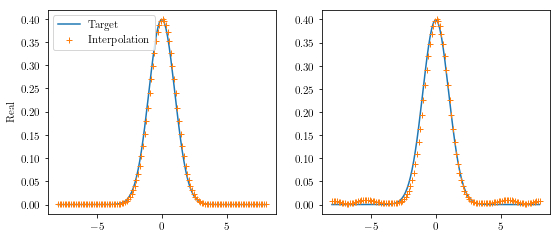

In [11]:
plt.figure(3, figsize=(2*4.5, 3.75))
plt.subplot(1,2,1)
plt.plot(x_grid, g1, '-', label='Target')
plt.plot(x_grid, np.abs(g2_interp), '+', label='Interpolation')
plt.ylabel('Real')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x_grid, g1, '-')
plt.plot(x_grid, np.abs(g3_interp), '+', label='Interpolation')